In [52]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew
from dateutil import parser
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import IPython
import IPython.display
import tensorflow as tf
from keras.models import Model
import keras.layers as kl
import keras.activations as ka
import gc
import warnings
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno
warnings.filterwarnings('ignore')
import pandas as pd
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, TimeDistributed, RepeatVector
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, RepeatVector, TimeDistributed, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanAbsoluteError
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from keras.models import load_model
from keras.losses import MeanAbsoluteError
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
df_train=pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/X_train_minmax_df1.csv")
df_train

,Date,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,general_missing
0,2021-06-19 00:01:02,0.508197,1.000000,0.160656,0.922358,0.129904,8.137705e-13,0.0
1,2021-06-19 00:01:22,0.491803,1.000000,0.384741,0.913047,0.128160,8.137705e-13,0.0
2,2021-06-19 00:01:44,0.508197,1.000000,0.122764,0.919259,0.129032,8.137705e-13,0.0
3,2021-06-19 00:02:07,0.508197,1.000000,0.935694,0.900623,0.128160,8.137705e-13,0.0
4,2021-06-19 00:02:27,0.508197,1.000000,0.093913,0.909941,0.129032,8.137705e-13,0.0
...,...,...,...,...,...,...,...,...
69796,2021-08-10 04:02:46,0.196721,0.929293,0.174472,0.034165,0.727114,1.098970e-12,0.0
69797,2021-08-10 04:03:05,0.196721,0.939394,0.049393,0.034165,0.733217,1.140609e-12,0.0
69798,2021-08-10 04:03:25,0.196721,0.939394,0.179029,0.027954,0.733217,1.124848e-12,0.0
69799,2021-08-10 04:04:04,0.213115,0.939394,0.190994,0.034165,0.743679,7.781265e-13,0.0


In [3]:
df_test=pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/X_test_minmax_df1.csv")
df_test

,Date,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,general_missing
0,2021-08-10 04:04:44,0.213115,0.939394,0.187534,0.027954,0.743679,8.349883e-13,0.0
1,2021-08-10 04:05:03,0.196721,0.939394,0.106389,0.027954,0.741935,9.811007e-13,0.0
2,2021-08-10 04:05:23,0.213115,0.929293,0.173815,0.027954,0.746295,1.053560e-12,0.0
3,2021-08-10 04:05:42,0.196721,0.939394,0.153370,0.040377,0.743679,8.061827e-13,0.0
4,2021-08-10 04:06:22,0.196721,0.939394,0.168819,0.037271,0.742807,8.308197e-13,0.0
...,...,...,...,...,...,...,...,...
29911,2021-10-13 02:48:31,0.934426,1.000000,0.010551,-3.096264,0.785527,1.358754e-11,0.0
29912,2021-10-13 03:17:36,0.934426,1.000000,0.024660,-3.018629,0.819529,9.609368e-12,0.0
29913,2021-10-13 03:46:49,0.918033,1.000000,0.020566,-3.173906,0.800349,1.891754e-11,0.0
29914,2021-10-13 04:13:23,0.885246,1.000000,0.117988,-3.195648,0.783784,2.462101e-11,0.0


In [4]:
print(df_train.columns)
print(df_test.columns)

Index(['Date', 'Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate',
       'Ammonia', 'general_missing'],
      dtype='object')
Index(['Date', 'Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate',
       'Ammonia', 'general_missing'],
      dtype='object')


In [5]:
print(df_train.describe)
print(df_test.describe)

<bound method NDFrame.describe of                       Date  Temperature  Turbidity  Dissolved_Oxygen  \
0      2021-06-19 00:01:02     0.508197   1.000000          0.160656   
1      2021-06-19 00:01:22     0.491803   1.000000          0.384741   
2      2021-06-19 00:01:44     0.508197   1.000000          0.122764   
3      2021-06-19 00:02:07     0.508197   1.000000          0.935694   
4      2021-06-19 00:02:27     0.508197   1.000000          0.093913   
...                    ...          ...        ...               ...   
69796  2021-08-10 04:02:46     0.196721   0.929293          0.174472   
69797  2021-08-10 04:03:05     0.196721   0.939394          0.049393   
69798  2021-08-10 04:03:25     0.196721   0.939394          0.179029   
69799  2021-08-10 04:04:04     0.213115   0.939394          0.190994   
69800  2021-08-10 04:04:24     0.213115   0.939394          0.152931   

             pH   Nitrate       Ammonia  general_missing  
0      0.922358  0.129904  8.137705e-13   

In [6]:
print(df_train.shape)
print(df_test.shape)

(69801, 8)
(29916, 8)


In [7]:
X_train = df_train.drop(['Date'], axis=1)

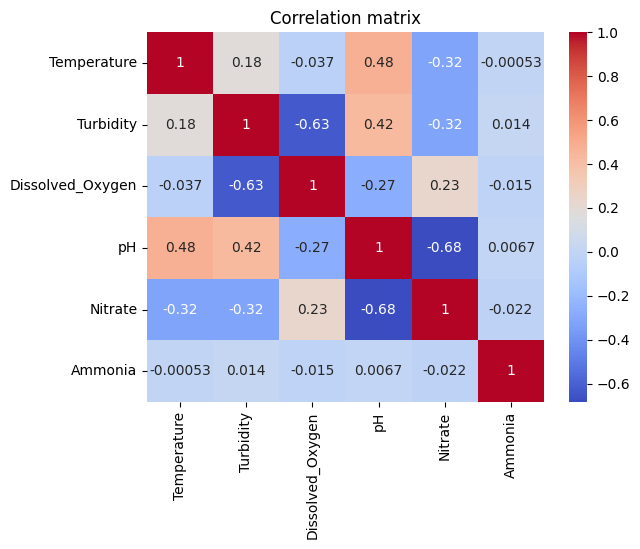

In [8]:
columns=['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate',
       'Ammonia']

df_corr=X_train[columns]

# Calculate the correlation matrix
corr = df_corr.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

#Add the title to my heatmap 

plt.title('Correlation matrix')
plt.show()

## Feature Importance using Unsupervised Methods


### Principal Component Analysis (PCA)

PCA is useful for understanding which features contribute the most to the variance in the data. It can help identify the key features driving the structure in dataset.

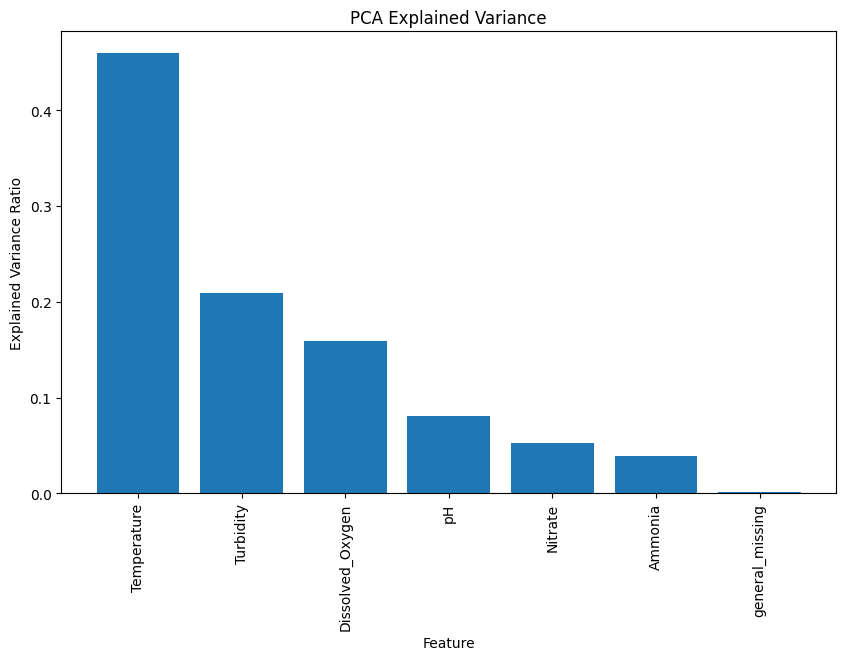

    Temperature     Turbidity  Dissolved_Oxygen            pH       Nitrate  \
0 -1.210452e-01 -5.635172e-01      5.835350e-01 -4.769648e-01  3.158910e-01   
1 -2.532904e-01  2.332033e-01     -5.632913e-01 -6.118999e-01  4.355935e-01   
2 -1.545144e-13  9.708757e-14     -4.018730e-13 -1.235367e-12  8.722172e-14   
3 -1.006483e-01 -7.698036e-01     -5.600524e-01  6.293240e-02 -2.822283e-01   
4  6.495071e-01 -1.826744e-01     -1.663889e-01  2.847433e-01  6.603023e-01   
5  6.994299e-01  4.578905e-02     -2.908074e-02 -5.595014e-01 -4.413729e-01   
6  4.293515e-04 -5.921728e-04      4.650629e-04  1.423215e-03  3.026029e-03   

        Ammonia  general_missing  
0 -8.301862e-04    -3.462651e-13  
1  6.155984e-05    -1.082064e-12  
2 -2.208949e-16     1.000000e+00  
3  6.122847e-04    -6.352198e-14  
4 -2.713022e-03     3.453957e-13  
5  1.872247e-03    -5.607523e-13  
6  9.999940e-01     2.025881e-15  


In [9]:
# Apply PCA
pca = PCA(n_components=len(X_train.columns))
pca.fit(X_train)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(len(X_train.columns)), pca.explained_variance_ratio_)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()

# Show the components that contribute to each principal component
print(pd.DataFrame(pca.components_, columns=X_train.columns))

### Isolation Forest Feature Importance

Isolation Forest is an unsupervised method specifically used for anomaly detection, and it can examine feature importances if use an ensemble method like this.

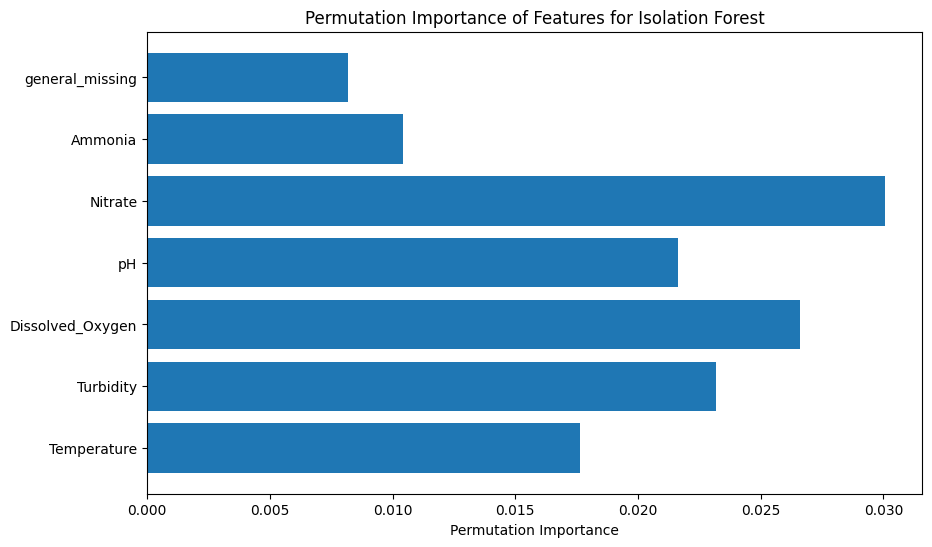

In [10]:
# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, random_state=42)
iso_forest.fit(X_train)

# Compute the anomaly score for the original data
original_scores = iso_forest.decision_function(X_train)

# Function to calculate the mean difference in anomaly scores when a feature is permuted
def permutation_feature_importance(model, X, original_scores):
    feature_importance = []
    for col in X.columns:
        X_permuted = X.copy()
        X_permuted[col] = np.random.permutation(X_permuted[col])
        permuted_scores = model.decision_function(X_permuted)
        mean_diff = np.mean(np.abs(original_scores - permuted_scores))
        feature_importance.append(mean_diff)
    return np.array(feature_importance)

# Calculate permutation-based feature importance
perm_importance = permutation_feature_importance(iso_forest, X_train, original_scores)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, perm_importance)
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance of Features for Isolation Forest')
plt.show()

### Feature Influence on Anomaly Detection

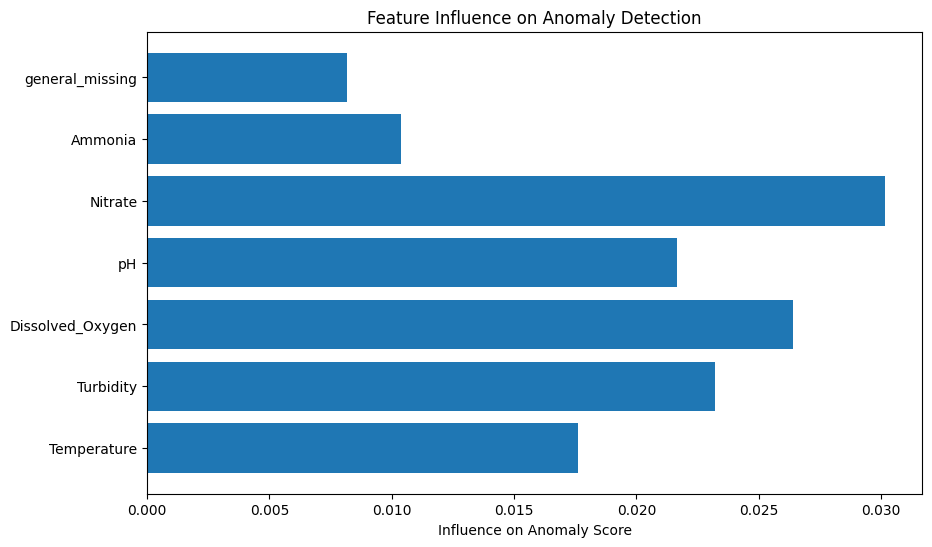

In [11]:
# Function to calculate the influence of each feature on the anomaly score
def feature_influence(model, X, feature_index):
    original_scores = model.decision_function(X)
    perturbed_X = X.copy()
    perturbed_X.iloc[:, feature_index] = np.random.permutation(perturbed_X.iloc[:, feature_index])
    perturbed_scores = model.decision_function(perturbed_X)
    influence = np.mean(np.abs(original_scores - perturbed_scores))
    return influence

# Calculate influence for each feature
influences = [feature_influence(iso_forest, X_train, i) for i in range(X_train.shape[1])]

# Plot the influence
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, influences)
plt.xlabel('Influence on Anomaly Score')
plt.title('Feature Influence on Anomaly Detection')
plt.show()

### Checking for outliers 

In [12]:
df_final_train=df_train.copy()

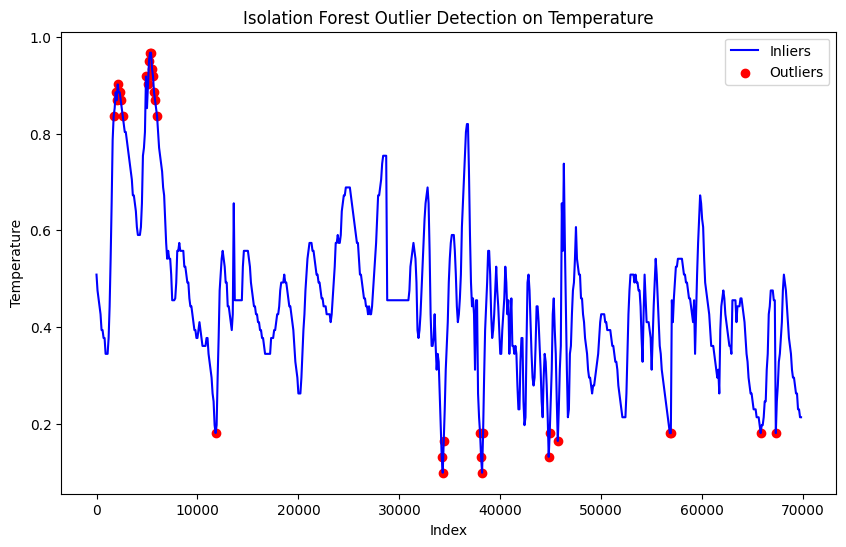

In [13]:
df_downsampled = df_final_train.iloc[::100]  # Take every 100th data point

# Detect outliers in the 'Temperature' column
X_downsampled = df_downsampled[['Temperature']].values  

# Create an Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model to downsampled data
model.fit(X_downsampled)

# Predict outliers (-1 for outliers, 1 for inliers)
outliers = model.predict(X_downsampled)

# Plot the data and mark outliers in red
plt.figure(figsize=(10, 6))

# Plot inliers as a line plot
plt.plot(df_downsampled.index, X_downsampled, color='blue', label='Inliers')

# Scatter plot for outliers in red
plt.scatter(df_downsampled.index[outliers == -1], X_downsampled[outliers == -1], color='red', label='Outliers')

plt.xlabel('Index')
plt.ylabel('Temperature')  
plt.title('Isolation Forest Outlier Detection on Temperature')
plt.legend()
plt.show()

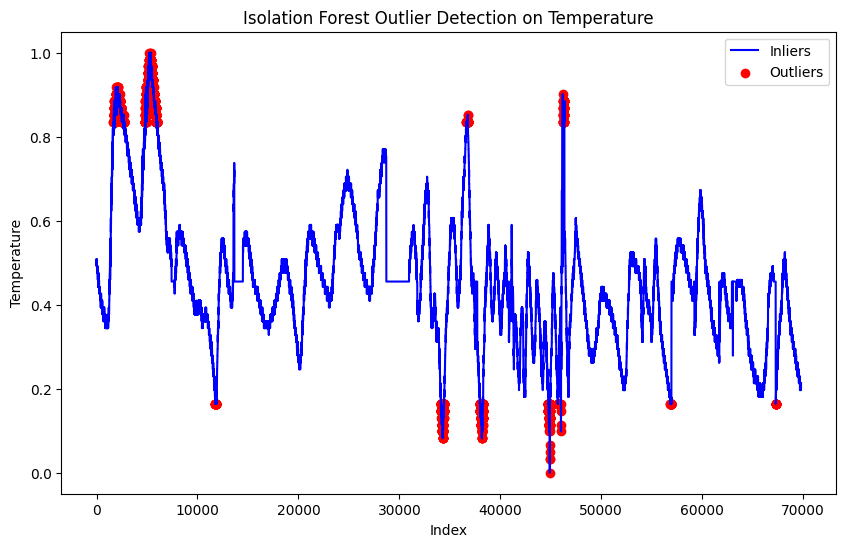

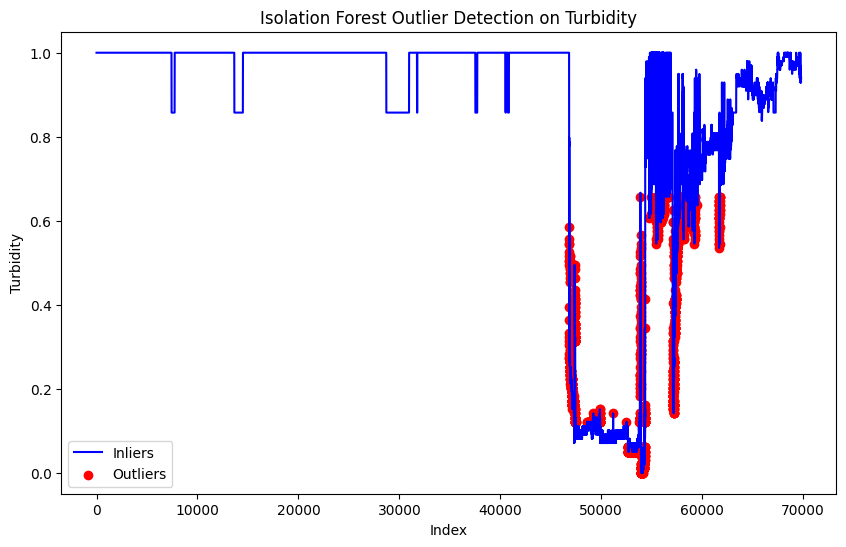

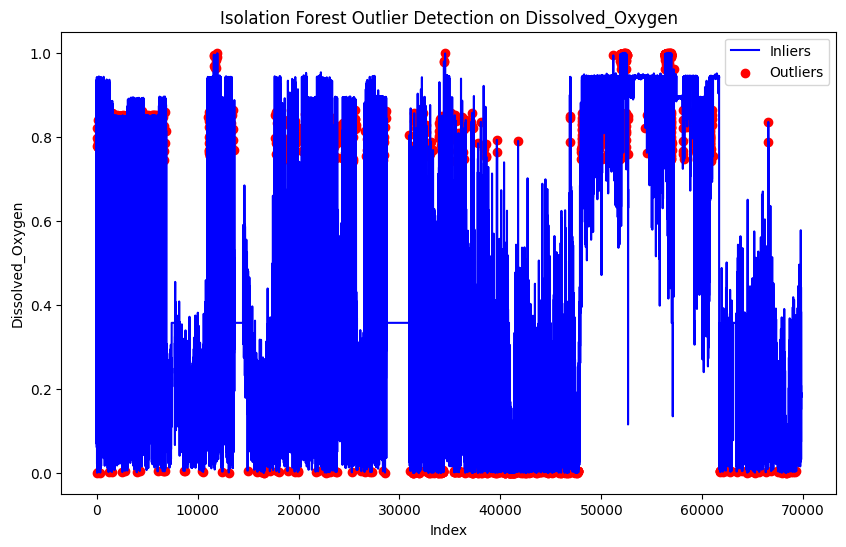

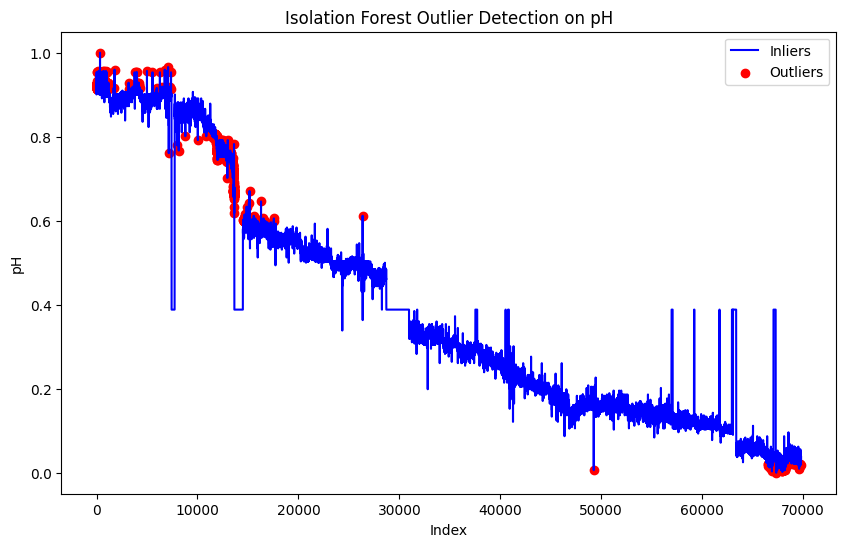

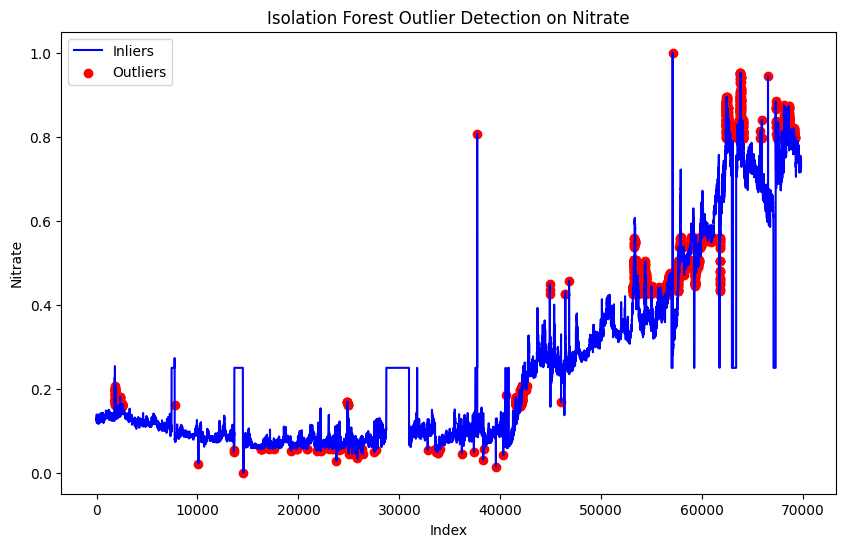

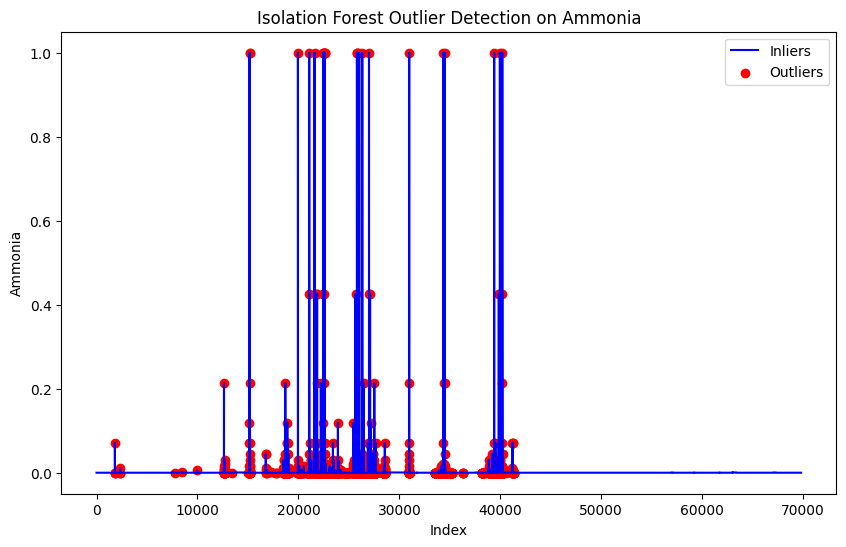

In [14]:
# List of columns to exclude from the Isolation Forest analysis
columns_to_exclude = ['Date', 'general_missing', 'Large_Gap']

# Select numeric columns for analysis
numeric_columns = [col for col in df_final_train.columns if col not in columns_to_exclude]

boundary_values = {}

for feature in numeric_columns:
    X_feature = df_final_train[[feature]].values

    model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

    model.fit(X_feature)

    outliers = model.predict(X_feature)

    inlier_values = X_feature[outliers == 1]
    min_inlier_value = np.min(inlier_values)
    max_inlier_value = np.max(inlier_values)

    boundary_values[feature] = {'min': min_inlier_value, 'max': max_inlier_value}

    # Plot the feature with outliers highlighted
    plt.figure(figsize=(10, 6))
    plt.plot(df_final_train.index, X_feature, color='blue', label='Inliers')
    plt.scatter(df_final_train.index[outliers == -1], X_feature[outliers == -1], color='red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.title(f'Isolation Forest Outlier Detection on {feature}')
    plt.legend()
    plt.show()



Lets check the original values. Reversed the scaling and find out the original values for each feature. 

Temperature - Min inlier value (original scale): 23.6875
Temperature - Max inlier value (original scale): 26.125


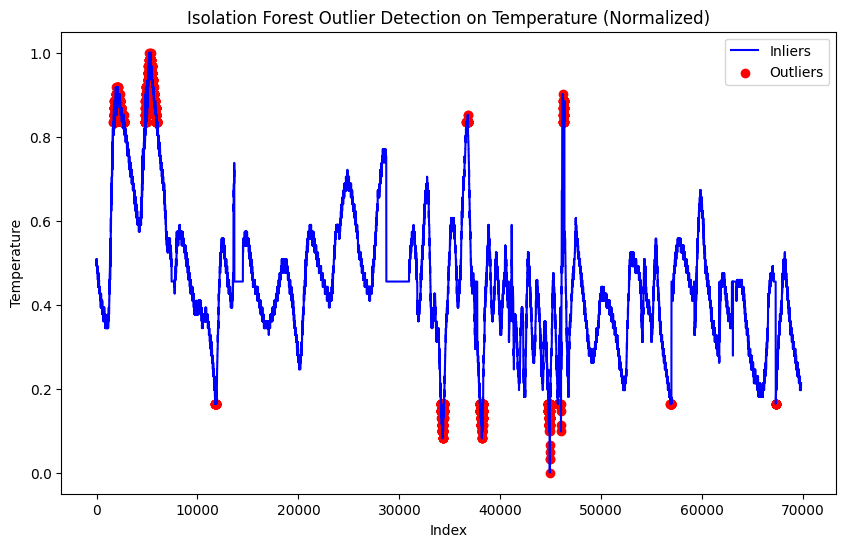

Turbidity - Min inlier value (original scale): 7.999999999999998
Turbidity - Max inlier value (original scale): 100.0


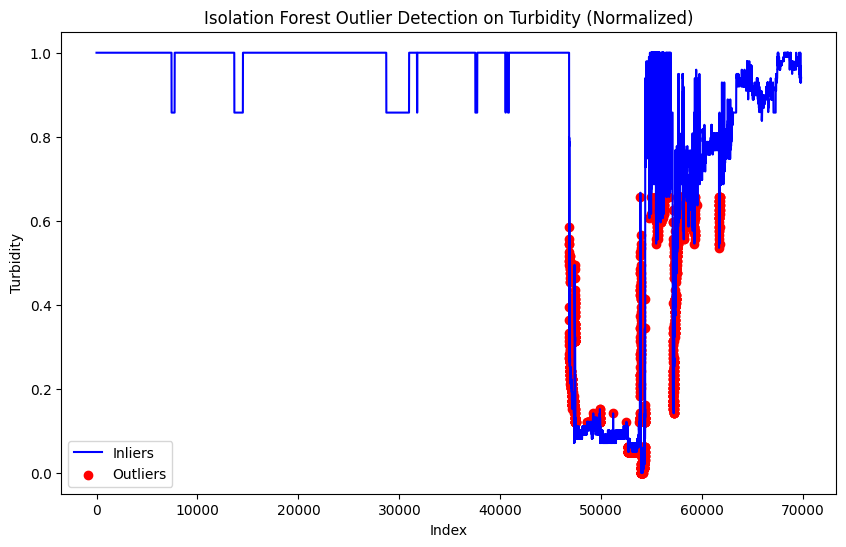

Dissolved_Oxygen - Min inlier value (original scale): 0.22299999999999884
Dissolved_Oxygen - Max inlier value (original scale): 39.413000000000004


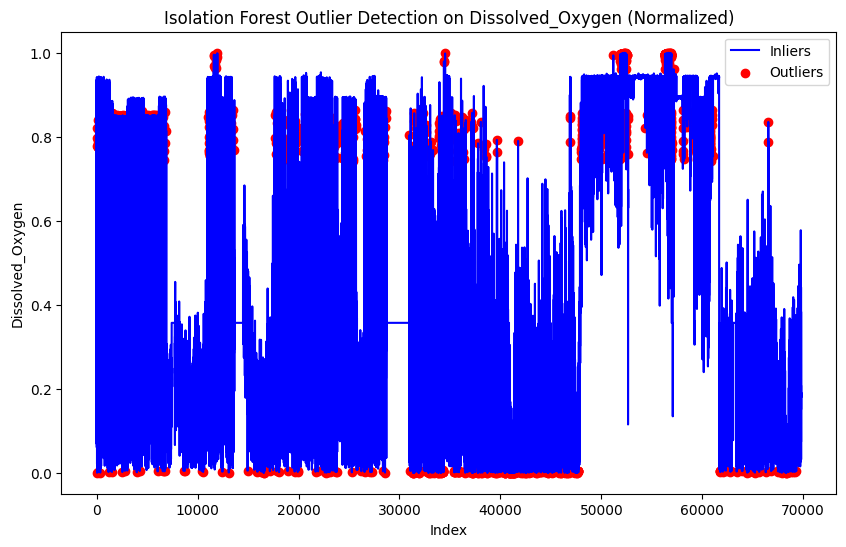

pH - Min inlier value (original scale): 7.12628
pH - Max inlier value (original scale): 8.42003


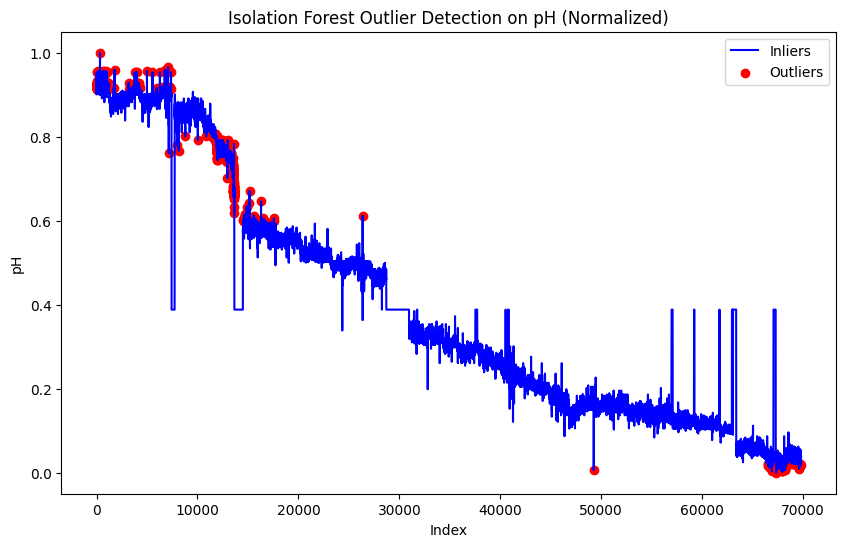

Nitrate - Min inlier value (original scale): 111.99999999999993
Nitrate - Max inlier value (original scale): 957.9999999999999


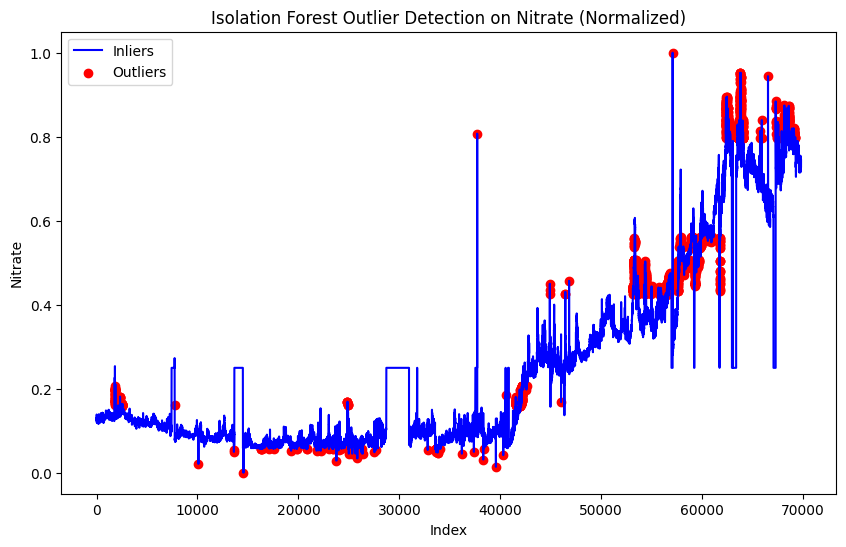

Ammonia - Min inlier value (original scale): 0.11094
Ammonia - Max inlier value (original scale): 258723495.09329236


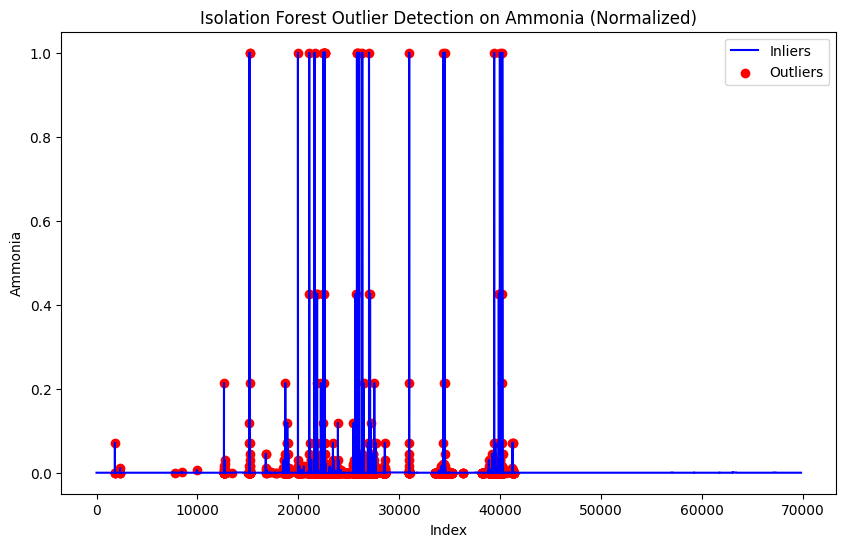

{'Temperature': {'min': 23.6875, 'max': 26.125}, 'Turbidity': {'min': 7.999999999999998, 'max': 100.0}, 'Dissolved_Oxygen': {'min': 0.22299999999999884, 'max': 39.413000000000004}, 'pH': {'min': 7.12628, 'max': 8.42003}, 'Nitrate': {'min': 111.99999999999993, 'max': 957.9999999999999}, 'Ammonia': {'min': 0.11094, 'max': 258723495.09329236}}


In [15]:
# Load the previously fitted scaler
scaler_minmax = joblib.load('scaler_minmax_df1.pkl')


original_boundary_values = {}

columns_to_transform = ['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate', 'Ammonia']


for feature in columns_to_transform:
    
    X_feature_normalized = df_final_train[[feature]].values 

    model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)


    model.fit(X_feature_normalized)

    outliers = model.predict(X_feature_normalized)

    # Find the minimum and maximum values for inliers in the normalized data
    inlier_values_normalized = X_feature_normalized[outliers == 1]
    min_inlier_value_normalized = np.min(inlier_values_normalized)
    max_inlier_value_normalized = np.max(inlier_values_normalized)

    # Create a dummy array that matches the expected input shape for inverse_transform
    dummy_array = np.zeros((1, len(columns_to_transform)))
    feature_index = columns_to_transform.index(feature)

    dummy_array[0, feature_index] = min_inlier_value_normalized
    min_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]
    
    dummy_array[0, feature_index] = max_inlier_value_normalized
    max_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]

    # Store the original boundary values in the dictionary
    original_boundary_values[feature] = {'min': min_inlier_value_original, 'max': max_inlier_value_original}

    print(f"{feature} - Min inlier value (original scale): {min_inlier_value_original}")
    print(f"{feature} - Max inlier value (original scale): {max_inlier_value_original}")

    plt.figure(figsize=(10, 6))
    plt.plot(df_final_train.index, X_feature_normalized, color='blue', label='Inliers')
    plt.scatter(df_final_train.index[outliers == -1], X_feature_normalized[outliers == -1], color='red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.title(f'Isolation Forest Outlier Detection on {feature} (Normalized)')
    plt.legend()
    plt.show()

print(original_boundary_values)

## Unsupervised Anomaly Detection with Autoencoder (LSTM)

	•	Objective: Detect anomalies by training an autoencoder model (LSTM-based) to reconstruct input data. Any significant reconstruction error is flagged as an anomaly.

### Feature Selection

In [16]:
# Select the features based on the analysis
selected_features = [
    'Temperature', 
    'Turbidity', 
    'Dissolved_Oxygen', 
    'pH', 
    'Nitrate' 
]

X_train = df_train[selected_features]
X_test = df_test[selected_features]
# Convert DataFrame to NumPy array
X_train_np = X_train.values
X_test_np = X_test.values

# Verify the conversion
print(f"Shape of the data after converting to numpy array: {X_train_np.shape}")
print(f"Shape of the data after converting to numpy array: {X_test_np.shape}")

Shape of the data after converting to numpy array: (69801, 5)
Shape of the data after converting to numpy array: (29916, 5)


### Preparing Data for Hybrid model

LSTM models require data in a specific 3D shape: (samples, time_steps, features). We need to reshape our dataset accordingly.

In [17]:
time_steps = 10  

# Reshape data to 3D array [number of sequences, time steps, features]
X_train_lstm = np.array([X_train_np[i:i+time_steps] for i in range(len(X_train_np) - time_steps + 1)])
X_test_lstm = np.array([X_test_np[i:i+time_steps] for i in range(len(X_test_np) - time_steps + 1)])

# Verify the shape
print(f"Shape of the dataset after reshaping: {X_train_lstm.shape}")
print(f"Shape of the dataset after reshaping: {X_test_lstm.shape}")

Shape of the dataset after reshaping: (69792, 10, 5)
Shape of the dataset after reshaping: (29907, 10, 5)


### Convert Boolean and Integer Values to Floats

In [18]:
# Function to convert mixed types to floats
def convert_to_float(value):
    if isinstance(value, bool):
        return float(value)
    elif isinstance(value, (int, float)):
        return float(value)
    else:
        return value

# Apply the conversion function
X_train_lstm = np.array([[[convert_to_float(item) for item in sublist] for sublist in sequence] for sequence in X_train_lstm], dtype=np.float32)
X_test_lstm = np.array([[[convert_to_float(item) for item in sublist] for sublist in sequence] for sequence in X_test_lstm], dtype=np.float32)

# Verify the conversion
print(f"Data types in the dataset after conversion: {X_train_lstm.dtype}")
print(f"Sample data from X_train_lstm after conversion: {X_train_lstm[:1]}")

print(f"Data types in the dataset after conversion: {X_test_lstm.dtype}")
print(f"Sample data from X_train_lstm after conversion: {X_test_lstm[:1]}")

Data types in the dataset after conversion: float32
Sample data from X_train_lstm after conversion: [[[0.5081967  1.         0.16065598 0.92235804 0.12990409]
  [0.4918033  1.         0.38474098 0.9130471  0.12816042]
  [0.5081967  1.         0.12276427 0.91925895 0.12903225]
  [0.5081967  1.         0.93569374 0.90062326 0.12816042]
  [0.5081967  1.         0.09391296 0.9099411  0.12903225]
  [0.4918033  1.         0.0687899  0.92235804 0.12990409]
  [0.5081967  1.         0.12193577 0.916153   0.12903225]
  [0.5081967  1.         0.07086115 0.916153   0.12816042]
  [0.4918033  1.         0.4141771  0.91925895 0.12816042]
  [0.4918033  1.         0.16950144 0.9534176  0.12728858]]]
Data types in the dataset after conversion: float32
Sample data from X_train_lstm after conversion: [[[0.21311475 0.93939394 0.18753351 0.02795356 0.74367917]
  [0.19672132 0.93939394 0.1063892  0.02795356 0.7419355 ]
  [0.21311475 0.9292929  0.17381452 0.02795356 0.7462947 ]
  [0.19672132 0.93939394 0.1533

In [19]:
X_train_lstm = X_train_lstm.astype(np.float32)
X_test_lstm = X_test_lstm.astype(np.float32)


print(f"Data types in the dataset after conversion: {X_train_lstm.dtype}")
print(f"Shape of the dataset after conversion: {X_train_lstm.shape}")

print(f"Data types in the dataset after conversion: {X_test_lstm.dtype}")
print(f"Shape of the dataset after conversion: {X_test_lstm.shape}")

Data types in the dataset after conversion: float32
Shape of the dataset after conversion: (69792, 10, 5)
Data types in the dataset after conversion: float32
Shape of the dataset after conversion: (29907, 10, 5)


In [20]:
# Verify that all elements are now of type float32
assert X_train_lstm.dtype == np.float32, "Not all elements are float32 after conversion!"
print("All data is now of type float32.")

assert X_test_lstm.dtype == np.float32, "Not all elements are float32 after conversion!"
print("All data is now of type float32.")

All data is now of type float32.
All data is now of type float32.


### Building the LSTM Autoencoder Model

Now we’ll build the LSTM Autoencoder. The encoder will learn to compress the input data, and the decoder will attempt to reconstruct it.

### Hybrid Model

The model was called “hybrid” because it combined different types of layers (Conv1D and LSTM) to leverage both spatial and temporal patterns:

	•	Conv1D Layers: Captured local patterns or trends in dataset.
	•	LSTM Layers: Captured the sequential, temporal dependencies over time.

By combining these different layers, the model can learn more complex and varied patterns, making it a hybrid of two different approaches.


In [21]:
# Define the optimized hybrid model
model_hybrid = Sequential()

# 1D Convolutional layer to capture local patterns
model_hybrid.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_hybrid.add(BatchNormalization())
model_hybrid.add(MaxPooling1D(pool_size=2))
model_hybrid.add(Dropout(0.5))

# LSTM layers to capture temporal dependencies
model_hybrid.add(LSTM(128, return_sequences=True))
model_hybrid.add(Dropout(0.5))
model_hybrid.add(LSTM(128, return_sequences=False))
model_hybrid.add(Dropout(0.5))

# RepeatVector layer to prepare for sequence reconstruction
model_hybrid.add(RepeatVector(X_train_lstm.shape[1]))

# LSTM layer to decode the sequence
model_hybrid.add(LSTM(128, return_sequences=True))
model_hybrid.add(Dropout(0.5))

# Final TimeDistributed Dense layer to reconstruct each time step
model_hybrid.add(TimeDistributed(Dense(X_train_lstm.shape[2])))

# Compile the model with the optimized learning rate
model_hybrid.compile(optimizer=Adam(learning_rate=0.0005), loss='mae')

# Summary of the model
model_hybrid.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8, 64)          │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 4, 128)         │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 10, 5)          │           645 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,909 (1.39 MB)

 Trainable params: 363,781 (1.39 MB)

 Non-trainable params: 128 (512.00 B)

### Train the Hybrid Model

Once the model is defined, we train it similarly to how we would train the LSTM model.

In [22]:
# Train the optimized hybrid model on the full training data
history_hybrid = model_hybrid.fit(X_train_lstm, X_train_lstm, epochs=20, batch_size=64, validation_split=0.1, shuffle=False)

Epoch 1/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 0.1511 - val_loss: 0.1861
Epoch 2/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 0.1324 - val_loss: 0.1672
Epoch 3/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 0.1150 - val_loss: 0.2027
Epoch 4/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - loss: 0.1362 - val_loss: 0.1650
Epoch 5/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.1145 - val_loss: 0.1775
Epoch 6/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - loss: 0.1212 - val_loss: 0.1627
Epoch 7/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - loss: 0.1150 - val_loss: 0.1549
Epoch 8/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - loss: 0.1130 - val_loss: 0.1512
Epoch 9/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - loss: 0.1161 - val_loss: 0.1509
Epoch 10/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - loss: 0.1196 - val_loss: 0.1469
Epoch 11/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.1199 - val_loss: 0.1445
Epoch 12/20
982/982 ━━━━━━━━━━

### Evaluate the Hybrid Model

Post-training, evaluate the model’s performance using reconstruction error:

## Train Data

In [23]:
X_train_pred_hybrid = model_hybrid.predict(X_train_lstm)

# Calculate reconstruction error on training data
train_mse_loss_hybrid = np.mean(np.power(X_train_lstm - X_train_pred_hybrid, 2), axis=(1, 2))

# Print some statistics about the reconstruction error
print(f"Mean reconstruction error (Train): {np.mean(train_mse_loss_hybrid)}")
print(f"Max reconstruction error (Train): {np.max(train_mse_loss_hybrid)}")

2181/2181 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
Mean reconstruction error (Train): 0.08121570944786072
Max reconstruction error (Train): 0.2686813473701477


In [24]:
# Set a threshold for anomaly detection (e.g., 95th percentile)
threshold_hybrid = np.percentile(train_mse_loss_hybrid, 95)

print(f"Anomaly detection threshold: {threshold_hybrid}")

Anomaly detection threshold: 0.20210883915424338


In [25]:
anomalies_train_hybrid = train_mse_loss_hybrid > threshold_hybrid

print(f"Number of anomalies detected: {np.sum(anomalies_train_hybrid)}")

Number of anomalies detected: 3490


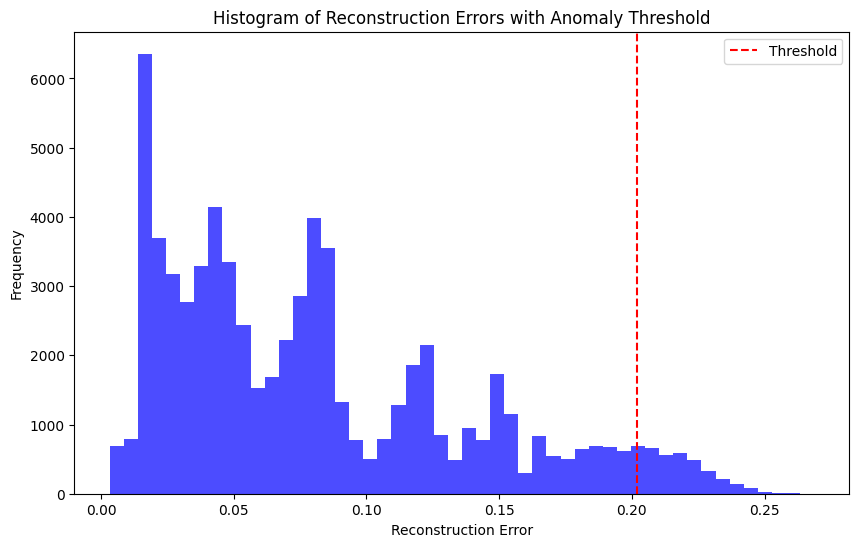

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(train_mse_loss_hybrid, bins=50, color='blue', alpha=0.7)
plt.axvline(threshold_hybrid, color='red', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Reconstruction Errors with Anomaly Threshold')
plt.show()

#### Evaluate Your Model Against This True_Anomaly

In [27]:
df_train_adjusted = df_train.iloc[time_steps-1:].copy()

In [28]:
df_train_adjusted['True_Anomaly'] = 0  # Initialize with 0 (no anomaly)
df_train_adjusted.loc[train_mse_loss_hybrid > threshold_hybrid, 'True_Anomaly'] = 1

In [29]:
precision = precision_score(df_train_adjusted['True_Anomaly'], anomalies_train_hybrid)
recall = recall_score(df_train_adjusted['True_Anomaly'], anomalies_train_hybrid)
f1 = f1_score(df_train_adjusted['True_Anomaly'], anomalies_train_hybrid)
cm = confusion_matrix(df_train_adjusted['True_Anomaly'], anomalies_train_hybrid)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[66302     0]
 [    0  3490]]


In [30]:
# Load the previously saved MinMaxScaler
scaler_minmax = joblib.load('scaler_minmax_df1.pkl')

original_boundary_values = {}

columns_to_transform = ['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate', 'Ammonia']

# Loop through each normalized feature
for feature in columns_to_transform:
    

    feature_index = columns_to_transform.index(feature)

    min_inlier_value_normalized = np.min(df_train_adjusted[feature])
    max_inlier_value_normalized = np.max(df_train_adjusted[feature])

    dummy_array = np.zeros((1, len(columns_to_transform)))

    dummy_array[0, feature_index] = min_inlier_value_normalized
    min_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]
    
    dummy_array[0, feature_index] = max_inlier_value_normalized
    max_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]

    original_boundary_values[feature] = {'min': min_inlier_value_original, 'max': max_inlier_value_original}

    # Print the original boundary values
    print(f"{feature} - Min inlier value (original scale): {min_inlier_value_original}")
    print(f"{feature} - Max inlier value (original scale): {max_inlier_value_original}")

print(original_boundary_values)

Temperature - Min inlier value (original scale): 23.0
Temperature - Max inlier value (original scale): 26.8125
Turbidity - Min inlier value (original scale): 1.0
Turbidity - Max inlier value (original scale): 100.0
Dissolved_Oxygen - Min inlier value (original scale): 0.008
Dissolved_Oxygen - Max inlier value (original scale): 41.04599999999999
pH - Min inlier value (original scale): 7.08996
pH - Max inlier value (original scale): 8.55167
Nitrate - Min inlier value (original scale): 45.0
Nitrate - Max inlier value (original scale): 1192.0
Ammonia - Min inlier value (original scale): 0.11094
Ammonia - Max inlier value (original scale): 427000000000.0
{'Temperature': {'min': 23.0, 'max': 26.8125}, 'Turbidity': {'min': 1.0, 'max': 100.0}, 'Dissolved_Oxygen': {'min': 0.008, 'max': 41.04599999999999}, 'pH': {'min': 7.08996, 'max': 8.55167}, 'Nitrate': {'min': 45.0, 'max': 1192.0}, 'Ammonia': {'min': 0.11094, 'max': 427000000000.0}}


### Implementing the Evaluation on Test Data:

## Test Data

935/935 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Anomaly detection threshold: 0.20210883915424338
Number of anomalies detected in test data: 655


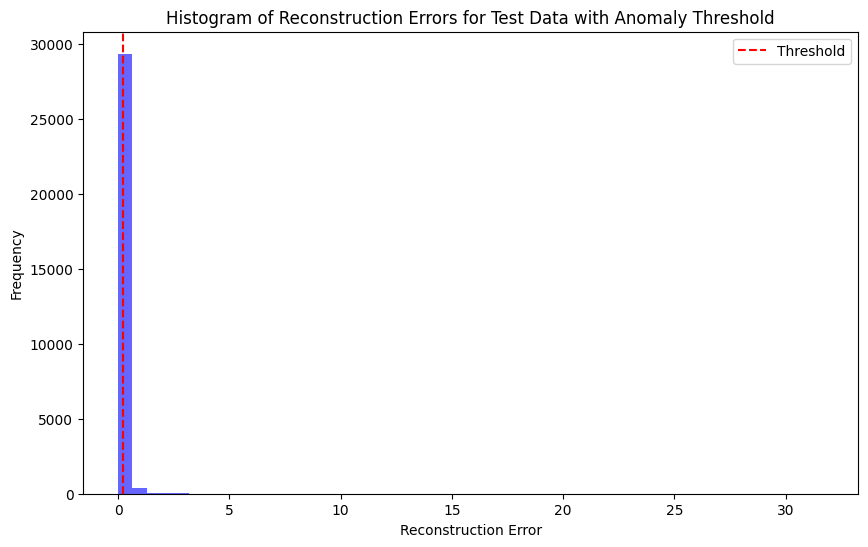

In [31]:
X_test_pred_hybrid = model_hybrid.predict(X_test_lstm)

test_mse_loss_hybrid = np.mean(np.power(X_test_lstm - X_test_pred_hybrid, 2), axis=(1, 2))

test_anomalies_hybrid = test_mse_loss_hybrid > threshold_hybrid
print(f"Anomaly detection threshold: {threshold_hybrid}")
print(f"Number of anomalies detected in test data: {np.sum(test_anomalies_hybrid)}")


plt.figure(figsize=(10, 6))
plt.hist(test_mse_loss_hybrid, bins=50, color='blue', alpha=0.6)
plt.axvline(threshold_hybrid, color='red', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Errors for Test Data with Anomaly Threshold')
plt.legend()
plt.show()

### Check the model in test_dataset

In [32]:
df_test_adjusted = df_test.iloc[time_steps-1:].copy()

In [33]:
threshold_hybrid = np.percentile(train_mse_loss_hybrid, 95)  # Reuse threshold from the training data

df_test_adjusted['True_Anomaly'] = 0  # Initialize with 0 (no anomaly)
df_test_adjusted.loc[test_mse_loss_hybrid > threshold_hybrid, 'True_Anomaly'] = 1

In [34]:
print("Columns in df_test_adjusted:", df_test_adjusted.columns)
if 'True_Anomaly' in df_test_adjusted.columns:
    print("True_Anomaly column found. Proceeding with evaluation.")
    precision = precision_score(df_test_adjusted['True_Anomaly'], test_anomalies_hybrid)
    recall = recall_score(df_test_adjusted['True_Anomaly'], test_anomalies_hybrid)
    f1 = f1_score(df_test_adjusted['True_Anomaly'], test_anomalies_hybrid)
    cm = confusion_matrix(df_test_adjusted['True_Anomaly'], test_anomalies_hybrid)

    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1 Score: {f1:.4f}")
    print("Test Confusion Matrix:")
    print(cm)
else:
    print("True_Anomaly column not found.")

Columns in df_test_adjusted: Index(['Date', 'Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate',
       'Ammonia', 'general_missing', 'True_Anomaly'],
      dtype='object')
True_Anomaly column found. Proceeding with evaluation.
Test Precision: 1.0000
Test Recall: 1.0000
Test F1 Score: 1.0000
Test Confusion Matrix:
[[29252     0]
 [    0   655]]


In [35]:
original_boundary_values = {}

columns_to_transform = ['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate', 'Ammonia']

# Loop through each normalized feature
for feature in columns_to_transform:

    feature_index = columns_to_transform.index(feature)

    min_inlier_value_normalized = np.min(df_test_adjusted[feature])
    max_inlier_value_normalized = np.max(df_test_adjusted[feature])

    dummy_array = np.zeros((1, len(columns_to_transform)))

    dummy_array[0, feature_index] = min_inlier_value_normalized
    min_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]
    
    dummy_array[0, feature_index] = max_inlier_value_normalized
    max_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]

    original_boundary_values[feature] = {'min': min_inlier_value_original, 'max': max_inlier_value_original}

    # Print the original boundary values
    print(f"{feature} - Min inlier value (original scale): {min_inlier_value_original}")
    print(f"{feature} - Max inlier value (original scale): {max_inlier_value_original}")

print(original_boundary_values)

Temperature - Min inlier value (original scale): -127.00000000000001
Temperature - Max inlier value (original scale): 27.75
Turbidity - Min inlier value (original scale): 82.0
Turbidity - Max inlier value (original scale): 100.0
Dissolved_Oxygen - Min inlier value (original scale): 0.007
Dissolved_Oxygen - Max inlier value (original scale): 27.575
pH - Min inlier value (original scale): -0.5862699999999995
pH - Max inlier value (original scale): 7.657629612158515
Nitrate - Min inlier value (original scale): 331.4473292736611
Nitrate - Max inlier value (original scale): 1936.0000000000002
Ammonia - Min inlier value (original scale): 0.006769999999999978
Ammonia - Max inlier value (original scale): 258723495.09329236
{'Temperature': {'min': -127.00000000000001, 'max': 27.75}, 'Turbidity': {'min': 82.0, 'max': 100.0}, 'Dissolved_Oxygen': {'min': 0.007, 'max': 27.575}, 'pH': {'min': -0.5862699999999995, 'max': 7.657629612158515}, 'Nitrate': {'min': 331.4473292736611, 'max': 1936.0000000000

### Plot Training and Validation Loss for Hybrid model

Visualizing the loss over epochs helps in understanding model performance:

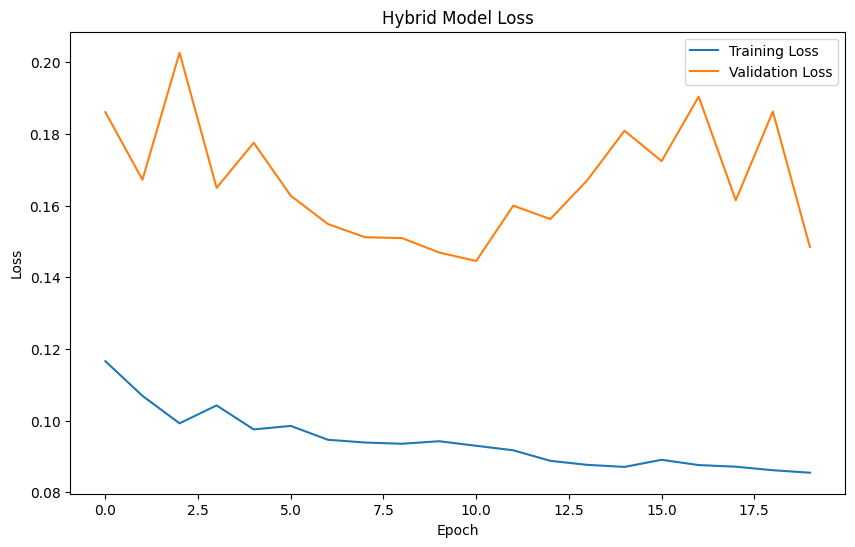

In [36]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history_hybrid.history['loss'], label='Training Loss')
plt.plot(history_hybrid.history['val_loss'], label='Validation Loss')
plt.title('Hybrid Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

### Downsample Train data

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


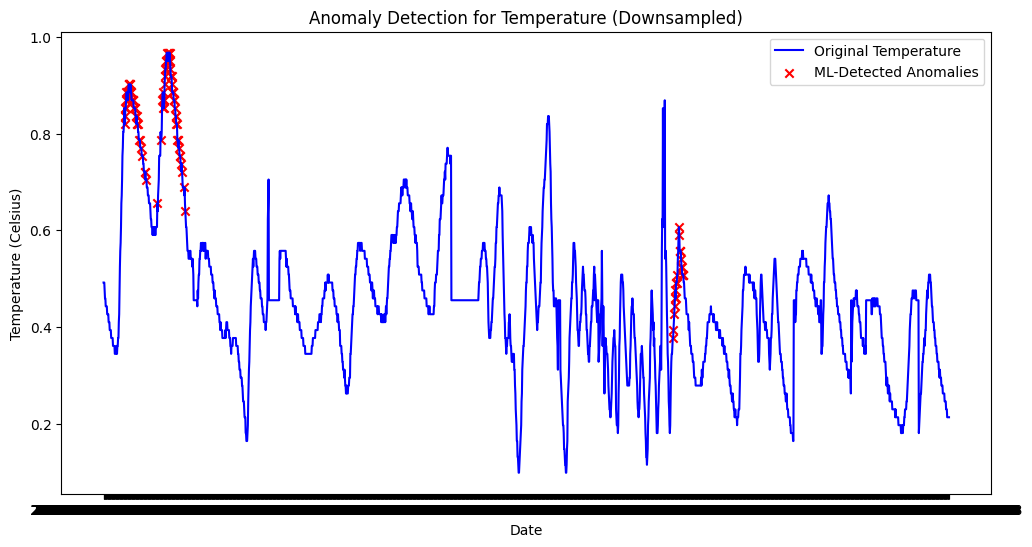

In [37]:
df_train_adjusted_downsampled = df_train_adjusted.iloc[::30].copy()

X_train_pred_downsampled = model_hybrid.predict(X_train_lstm[::30])

train_mse_loss_downsampled = np.mean(np.power(X_train_lstm[::30] - X_train_pred_downsampled, 2), axis=(1, 2))

threshold_downsampled = np.percentile(train_mse_loss_downsampled, 95)

# Detect anomalies on the downsampled data
anomalies_downsampled = train_mse_loss_downsampled > threshold_downsampled

# Update the anomalies column in the downsampled DataFrame
df_train_adjusted_downsampled['ML_Anomaly'] = anomalies_downsampled

plt.figure(figsize=(12, 6))
plt.plot(df_train_adjusted_downsampled['Date'], df_train_adjusted_downsampled['Temperature'], label='Original Temperature', color='blue')
plt.scatter(df_train_adjusted_downsampled['Date'][anomalies_downsampled], df_train_adjusted_downsampled['Temperature'][anomalies_downsampled], color='red', label='ML-Detected Anomalies', marker='x')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Anomaly Detection for Temperature (Downsampled)')
plt.legend()
plt.show()

### Downsampled test_sample

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


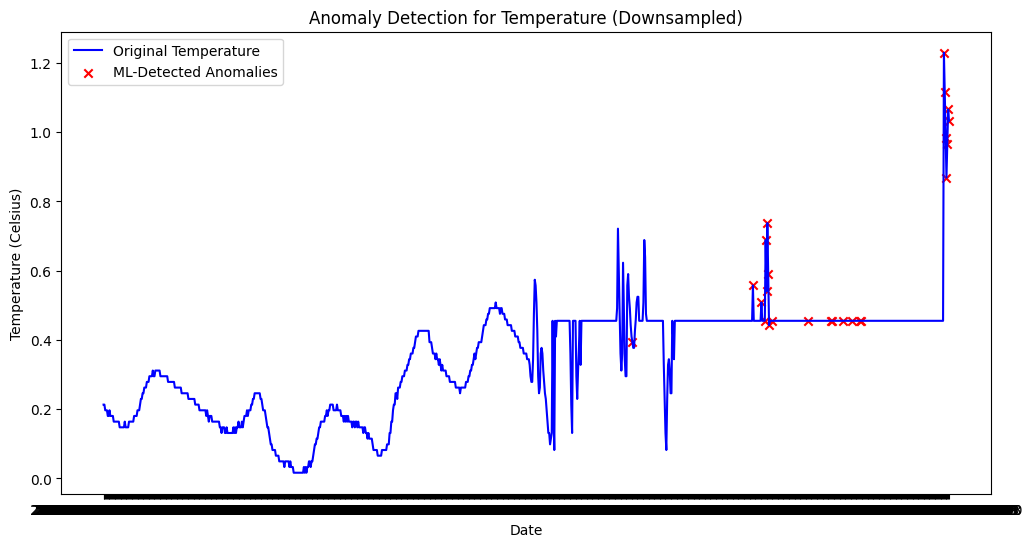

In [38]:
df_test_adjusted_downsampled = df_test_adjusted.iloc[::30].copy()

X_test_pred_downsampled = model_hybrid.predict(X_test_lstm[::30])

# Calculate reconstruction error for downsampled data
test_mse_loss_downsampled = np.mean(np.power(X_test_lstm[::30] - X_test_pred_downsampled, 2), axis=(1, 2))

# Set a new threshold for downsampled data
threshold_downsampled = np.percentile(train_mse_loss_downsampled, 95)

# Detect anomalies on the downsampled data
anomalies_downsampled = test_mse_loss_downsampled > threshold_downsampled

# Update the anomalies column in the downsampled DataFrame
df_test_adjusted_downsampled['ML_Anomaly'] = anomalies_downsampled

plt.figure(figsize=(12, 6))
plt.plot(df_test_adjusted_downsampled['Date'], df_test_adjusted_downsampled['Temperature'], label='Original Temperature', color='blue')
plt.scatter(df_test_adjusted_downsampled['Date'][anomalies_downsampled], df_test_adjusted_downsampled['Temperature'][anomalies_downsampled], color='red', label='ML-Detected Anomalies', marker='x')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Anomaly Detection for Temperature (Downsampled)')
plt.legend()
plt.show()

## Apply Hybrid and Isolation Forest on the Train Dataset
Apply Hybrid Model for Anomaly Detection
First,I already have the Hybrid model that predicts anomalies based on reconstruction errors. This model will give me a threshold-based anomaly detection output.

Apply Isolation Forest on Hybrid Model’s Output
Now, I can apply an Isolation Forest model to the reconstruction errors of the Hybrid model to catch any anomalies that the Hybrid model might have missed.

Evaluate the Combined (Hybrid) Model
Finally, evaluate the performance of this hybrid approach by calculating the precision, recall, F1 score, and confusion matrix. Also, visualize the anomalies on the temperature data.

2181/2181 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
Hybrid Model with IF Precision (Train): 0.7440
Hybrid Model with IF Recall (Train): 1.0000
Hybrid Model with IF F1 Score (Train): 0.8532
Confusion Matrix (Hybrid Model with IF - Train):
[[65101  1201]
 [    0  3490]]


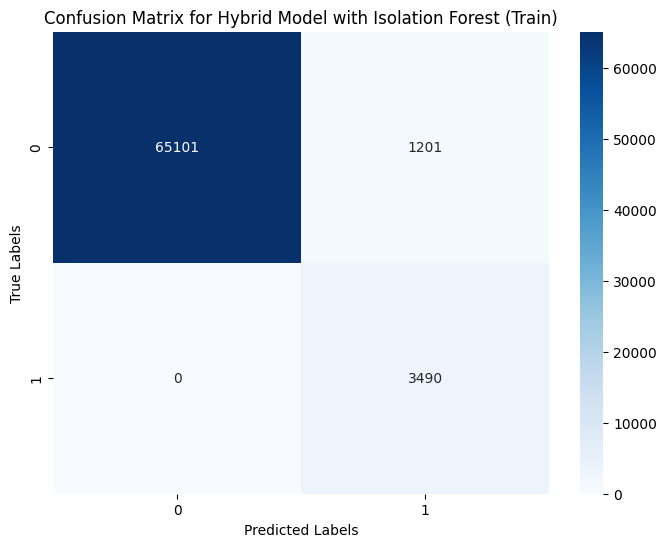

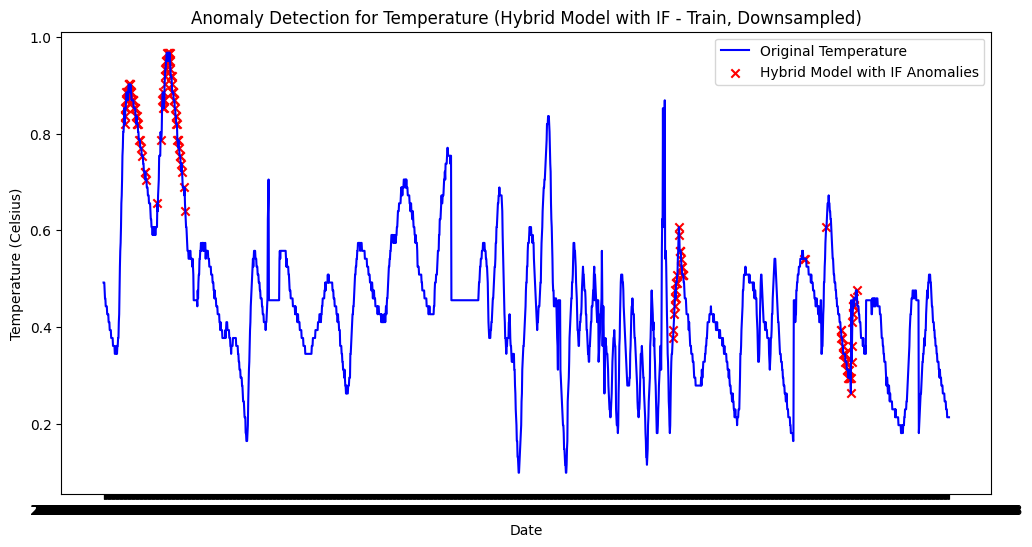

In [39]:
X_train_pred_hybrid = model_hybrid.predict(X_train_lstm)


train_mse_loss_hybrid = np.mean(np.power(X_train_lstm - X_train_pred_hybrid, 2), axis=(1, 2))

isolation_model_hybrid_train = np.percentile(train_mse_loss_hybrid, 95)
anomaly_labels_iforest_train = train_mse_loss_hybrid > threshold_hybrid

df_train_adjusted['LSTM_Anomaly'] = anomaly_labels_iforest_train.astype(int)

isolation_model_hybrid_train = IsolationForest(contamination=0.05, random_state=42)
anomaly_labels_iforest_train = isolation_model_hybrid_train.fit_predict(train_mse_loss_hybrid.reshape(-1, 1))

anomaly_labels_iforest_train = np.where(anomaly_labels_iforest_train == -1, 1, 0)

df_train_adjusted['Hybrid_Anomaly_IF'] = np.maximum(df_train_adjusted['LSTM_Anomaly'], anomaly_labels_iforest_train)

precision_hybrid_if_train = precision_score(df_train_adjusted['True_Anomaly'], df_train_adjusted['Hybrid_Anomaly_IF'])
recall_hybrid_if_train = recall_score(df_train_adjusted['True_Anomaly'], df_train_adjusted['Hybrid_Anomaly_IF'])
f1_hybrid_if_train = f1_score(df_train_adjusted['True_Anomaly'], df_train_adjusted['Hybrid_Anomaly_IF'])
cm_hybrid_if_train = confusion_matrix(df_train_adjusted['True_Anomaly'], df_train_adjusted['Hybrid_Anomaly_IF'])

print(f"Hybrid Model with IF Precision (Train): {precision_hybrid_if_train:.4f}")
print(f"Hybrid Model with IF Recall (Train): {recall_hybrid_if_train:.4f}")
print(f"Hybrid Model with IF F1 Score (Train): {f1_hybrid_if_train:.4f}")
print("Confusion Matrix (Hybrid Model with IF - Train):")
print(cm_hybrid_if_train)

# Step 6: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_hybrid_if_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Hybrid Model with Isolation Forest (Train)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

df_train_adjusted_downsampled = df_train_adjusted.iloc[::30].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_train_adjusted_downsampled['Date'], df_train_adjusted_downsampled['Temperature'], label='Original Temperature', color='blue')
plt.scatter(df_train_adjusted_downsampled['Date'][df_train_adjusted_downsampled['Hybrid_Anomaly_IF'] == 1], 
            df_train_adjusted_downsampled['Temperature'][df_train_adjusted_downsampled['Hybrid_Anomaly_IF'] == 1], 
            color='red', label='Hybrid Model with IF Anomalies', marker='x')

plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Anomaly Detection for Temperature (Hybrid Model with IF - Train, Downsampled)')
plt.legend()
plt.show()

In [40]:
original_boundary_values = {}

columns_to_transform = ['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate', 'Ammonia']

# Loop through each normalized feature
for feature in columns_to_transform:
    
    # Extract the index of the current feature
    feature_index = columns_to_transform.index(feature)

    min_anomaly_value_normalized = np.min(df_train_adjusted[feature][df_train_adjusted['Hybrid_Anomaly_IF'] == 1])
    max_anomaly_value_normalized = np.max(df_train_adjusted[feature][df_train_adjusted['Hybrid_Anomaly_IF'] == 1])

    dummy_array = np.zeros((1, len(columns_to_transform)))

    dummy_array[0, feature_index] = min_anomaly_value_normalized
    min_anomaly_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]

    dummy_array[0, feature_index] = max_anomaly_value_normalized
    max_anomaly_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]

    original_boundary_values[feature] = {'min': min_anomaly_value_original, 'max': max_anomaly_value_original}

    # Print the original boundary values
    print(f"{feature} - Min anomaly value (original scale): {min_anomaly_value_original}")
    print(f"{feature} - Max anomaly value (original scale): {max_anomaly_value_original}")

print(original_boundary_values)

Temperature - Min anomaly value (original scale): 24.0
Temperature - Max anomaly value (original scale): 26.8125
Turbidity - Min anomaly value (original scale): 7.999999999999998
Turbidity - Max anomaly value (original scale): 100.0
Dissolved_Oxygen - Min anomaly value (original scale): 0.008
Dissolved_Oxygen - Max anomaly value (original scale): 39.02400000000001
pH - Min anomaly value (original scale): 7.19437
pH - Max anomaly value (original scale): 8.49266
Nitrate - Min anomaly value (original scale): 165.0
Nitrate - Max anomaly value (original scale): 913.0
Ammonia - Min anomaly value (original scale): 0.22656999999999997
Ammonia - Max anomaly value (original scale): 4787283967.999991
{'Temperature': {'min': 24.0, 'max': 26.8125}, 'Turbidity': {'min': 7.999999999999998, 'max': 100.0}, 'Dissolved_Oxygen': {'min': 0.008, 'max': 39.02400000000001}, 'pH': {'min': 7.19437, 'max': 8.49266}, 'Nitrate': {'min': 165.0, 'max': 913.0}, 'Ammonia': {'min': 0.22656999999999997, 'max': 478728396

## Apply Trained Hybrid + Isolation Forest Model on Test Data

935/935 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Hybrid Model with IF Precision (Test): 0.9985
Hybrid Model with IF Recall (Test): 0.9939
Hybrid Model with IF F1 Score (Test): 0.9962
Confusion Matrix (Hybrid Model with IF - Test):
[[29251     1]
 [    4   651]]


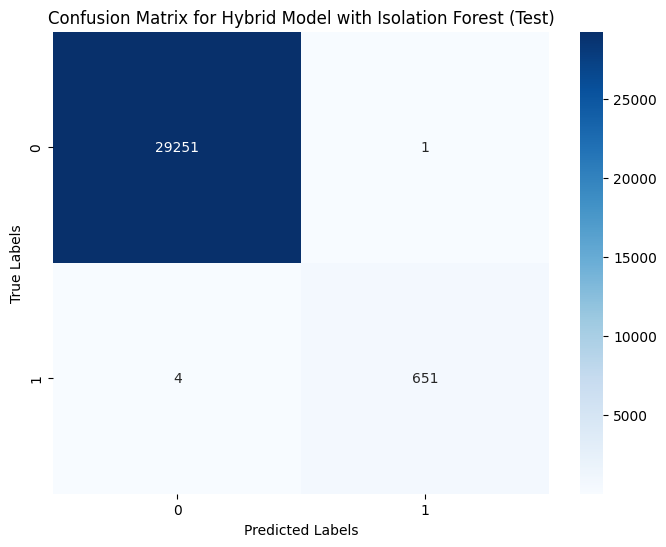

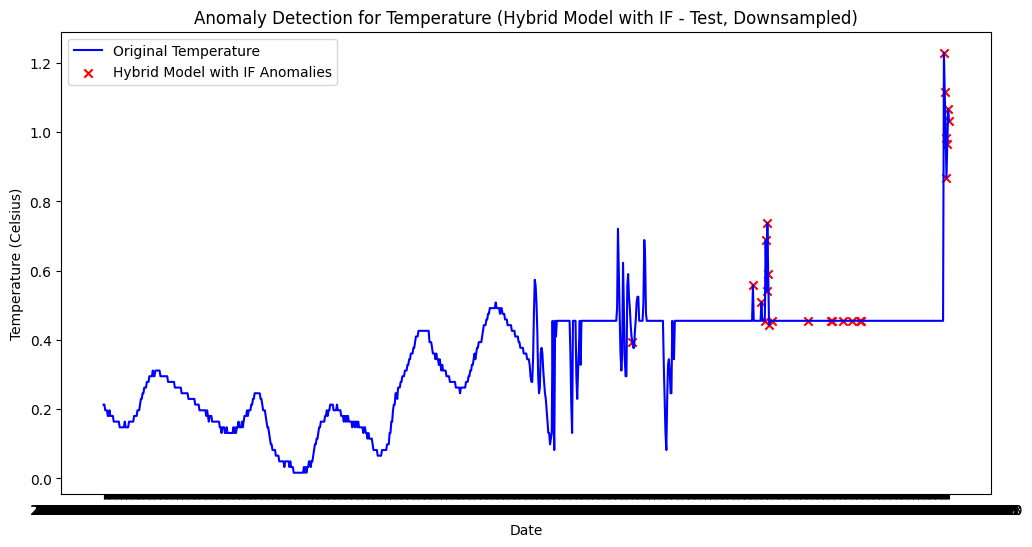

In [41]:
X_test_pred_hybrid = model_hybrid.predict(X_test_lstm)

test_mse_loss_hybrid = np.mean(np.power(X_test_lstm - X_test_pred_hybrid, 2), axis=(1, 2))

anomaly_labels_iforest_test = isolation_model_hybrid_train.predict(test_mse_loss_hybrid.reshape(-1, 1))

anomaly_labels_iforest_test = np.where(anomaly_labels_iforest_test == -1, 1, 0)

df_test_adjusted['Hybrid_Anomaly_IF'] = anomaly_labels_iforest_test

precision_hybrid_if_test = precision_score(df_test_adjusted['True_Anomaly'], df_test_adjusted['Hybrid_Anomaly_IF'])
recall_hybrid_if_test = recall_score(df_test_adjusted['True_Anomaly'], df_test_adjusted['Hybrid_Anomaly_IF'])
f1_hybrid_if_test = f1_score(df_test_adjusted['True_Anomaly'], df_test_adjusted['Hybrid_Anomaly_IF'])
cm_hybrid_if_test = confusion_matrix(df_test_adjusted['True_Anomaly'], df_test_adjusted['Hybrid_Anomaly_IF'])

print(f"Hybrid Model with IF Precision (Test): {precision_hybrid_if_test:.4f}")
print(f"Hybrid Model with IF Recall (Test): {recall_hybrid_if_test:.4f}")
print(f"Hybrid Model with IF F1 Score (Test): {f1_hybrid_if_test:.4f}")
print("Confusion Matrix (Hybrid Model with IF - Test):")
print(cm_hybrid_if_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_hybrid_if_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Hybrid Model with Isolation Forest (Test)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

df_test_adjusted_downsampled = df_test_adjusted.iloc[::30].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_test_adjusted_downsampled['Date'], df_test_adjusted_downsampled['Temperature'], label='Original Temperature', color='blue')
plt.scatter(df_test_adjusted_downsampled['Date'][df_test_adjusted_downsampled['Hybrid_Anomaly_IF'] == 1], 
            df_test_adjusted_downsampled['Temperature'][df_test_adjusted_downsampled['Hybrid_Anomaly_IF'] == 1], 
            color='red', label='Hybrid Model with IF Anomalies', marker='x')

plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Anomaly Detection for Temperature (Hybrid Model with IF - Test, Downsampled)')
plt.legend()
plt.show()

In [42]:
original_boundary_values = {}

columns_to_transform = ['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate', 'Ammonia']

# Loop through each normalized feature
for feature in columns_to_transform:
    
    feature_index = columns_to_transform.index(feature)
    
    min_anomaly_value_normalized = np.min(df_test_adjusted[feature][df_test_adjusted['Hybrid_Anomaly_IF'] == 1])
    max_anomaly_value_normalized = np.max(df_test_adjusted[feature][df_test_adjusted['Hybrid_Anomaly_IF'] == 1])

    dummy_array = np.zeros((1, len(columns_to_transform)))

    dummy_array[0, feature_index] = min_anomaly_value_normalized
    min_anomaly_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]
    
    dummy_array[0, feature_index] = max_anomaly_value_normalized
    max_anomaly_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]

    original_boundary_values[feature] = {'min': min_anomaly_value_original, 'max': max_anomaly_value_original}

    print(f"{feature} - Min anomaly value (original scale): {min_anomaly_value_original}")
    print(f"{feature} - Max anomaly value (original scale): {max_anomaly_value_original}")

print(original_boundary_values)

Temperature - Min anomaly value (original scale): -127.00000000000001
Temperature - Max anomaly value (original scale): 27.6875
Turbidity - Min anomaly value (original scale): 85.8862238717022
Turbidity - Max anomaly value (original scale): 100.0
Dissolved_Oxygen - Min anomaly value (original scale): 0.007
Dissolved_Oxygen - Max anomaly value (original scale): 14.652647905892268
pH - Min anomaly value (original scale): -0.5862699999999995
pH - Max anomaly value (original scale): 7.657629612158515
Nitrate - Min anomaly value (original scale): 331.4473292736611
Nitrate - Max anomaly value (original scale): 1440.0
Ammonia - Min anomaly value (original scale): 0.15998
Ammonia - Max anomaly value (original scale): 258723495.09329236
{'Temperature': {'min': -127.00000000000001, 'max': 27.6875}, 'Turbidity': {'min': 85.8862238717022, 'max': 100.0}, 'Dissolved_Oxygen': {'min': 0.007, 'max': 14.652647905892268}, 'pH': {'min': -0.5862699999999995, 'max': 7.657629612158515}, 'Nitrate': {'min': 33

#### Save the model 

In [43]:
model_hybrid.compile(optimizer=Adam(learning_rate=0.001), loss=MeanAbsoluteError())

# Save the model
model_hybrid.save('hybrid_model_df1.h5')

#### Load the model

In [44]:
model_hybrid = load_model('hybrid_model_df1.h5', custom_objects={'MeanAbsoluteError': MeanAbsoluteError})

In [45]:
split_index = int(0.9 * X_train_lstm.shape[0])
X_val_lstm = X_train_lstm[split_index:]
X_train_lstm_actual = X_train_lstm[:split_index]

# Recalculate validation predictions
X_val_pred = model_hybrid.predict(X_val_lstm)

# Calculate MSE for validation and test datasets
val_mse_loss = mean_squared_error(X_val_lstm.reshape(-1, X_val_lstm.shape[2]), X_val_pred.reshape(-1, X_val_pred.shape[2]))
test_mse_loss = mean_squared_error(X_test_lstm.reshape(-1, X_test_lstm.shape[2]), X_test_pred_hybrid.reshape(-1, X_test_pred_hybrid.shape[2]))

# Store the results in a dictionary
model_results = {
    'Hybrid LSTM': {
        'Validation MSE': val_mse_loss,
        'Test MSE': test_mse_loss
    }
}

# Print the results
print("Validation MSE:", val_mse_loss)
print("Test MSE:", test_mse_loss)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Validation MSE: 0.039583825
Test MSE: 0.06855972


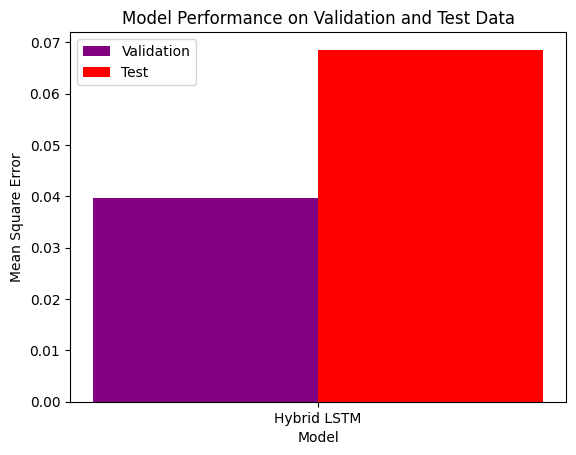

In [46]:
model_names = list(model_results.keys())
validation_mse = [model_results[name]['Validation MSE'] for name in model_names]
test_mse = [model_results[name]['Test MSE'] for name in model_names]

# Plotting the bar chart
fig, ax = plt.subplots()

index = np.arange(len(model_names))
bar_width = 0.35

bars1 = ax.bar(index, validation_mse, bar_width, label='Validation', color='purple')
bars2 = ax.bar(index + bar_width, test_mse, bar_width, label='Test', color='red')

ax.set_xlabel('Model')
ax.set_ylabel('Mean Square Error')
ax.set_title('Model Performance on Validation and Test Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()

In [47]:
model_hybrid.compile(optimizer=Adam(learning_rate=0.001), loss=MeanAbsoluteError())

# Save the model
model_hybrid.save('hybrid_model_df1.h5')

## K-Fold Cross-Validation

In [48]:
# Set the number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store cross-validation results
precision_scores = []
recall_scores = []
f1_scores = []

# Perform K-Fold Cross-Validation
for train_index, val_index in kf.split(X_train_lstm):
    # Split the data
    X_train_cv, X_val_cv = X_train_lstm[train_index], X_train_lstm[val_index]
    
    # Train the LSTM model
    model_hybrid.fit(X_train_cv, X_train_cv, epochs=10, batch_size=32, verbose=0)
    
    # Predict on the validation data
    X_val_pred_hybrid = model_hybrid.predict(X_val_cv)
    
    # Calculate the reconstruction errors
    val_mse_loss_hybrid = np.mean(np.power(X_val_cv - X_val_pred_hybrid, 2), axis=(1, 2))
    
    # Apply Isolation Forest on the validation reconstruction errors
    isolation_model_cv = IsolationForest(contamination=0.05, random_state=42)
    anomaly_labels_iforest_val = isolation_model_cv.fit_predict(val_mse_loss_hybrid.reshape(-1, 1))
    anomaly_labels_iforest_val = np.where(anomaly_labels_iforest_val == -1, 1, 0)
    
    # Combine LSTM and IF anomalies (hybrid model)
    anomalies_val_hybrid = anomaly_labels_iforest_val
    
    # Evaluate performance on validation data
    precision_cv = precision_score(df_train_adjusted['True_Anomaly'].iloc[val_index], anomalies_val_hybrid)
    recall_cv = recall_score(df_train_adjusted['True_Anomaly'].iloc[val_index], anomalies_val_hybrid)
    f1_cv = f1_score(df_train_adjusted['True_Anomaly'].iloc[val_index], anomalies_val_hybrid)
    
    # Append the scores
    precision_scores.append(precision_cv)
    recall_scores.append(recall_cv)
    f1_scores.append(f1_cv)

# Calculate the average metrics across all folds
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

print(f"Average Precision across {k} folds: {average_precision:.4f}")
print(f"Average Recall across {k} folds: {average_recall:.4f}")
print(f"Average F1 Score across {k} folds: {average_f1:.4f}")

437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Average Precision across 5 folds: 0.1835
Average Recall across 5 folds: 0.1820
Average F1 Score across 5 folds: 0.1827


## Threshold Optimization

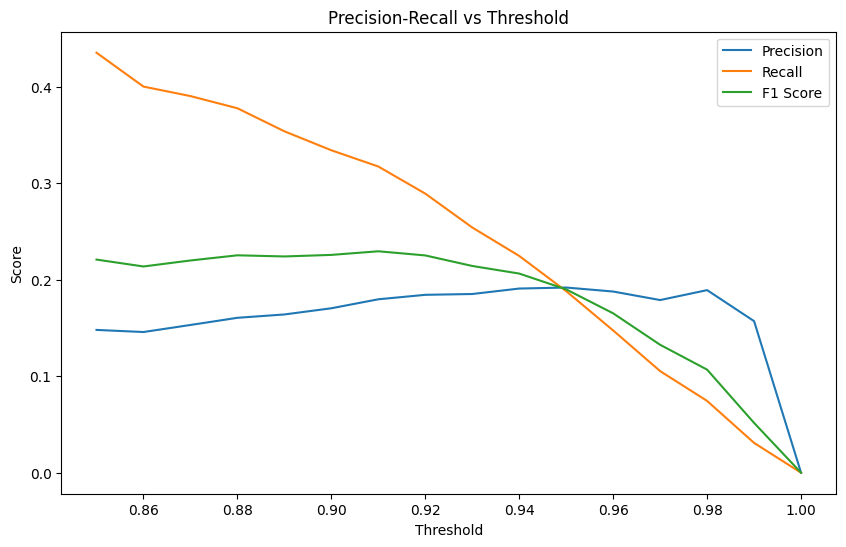

Optimal Threshold: 0.91


In [49]:
# Initialize lists to store metrics
thresholds = np.arange(0.85, 1.0, 0.01)
precisions = []
recalls = []
f1_scores = []

# Experiment with different thresholds
for threshold in thresholds:
    anomalies_val_hybrid = val_mse_loss_hybrid > np.percentile(val_mse_loss_hybrid, threshold * 100)
    
    precision = precision_score(df_train_adjusted['True_Anomaly'].iloc[val_index], anomalies_val_hybrid)
    recall = recall_score(df_train_adjusted['True_Anomaly'].iloc[val_index], anomalies_val_hybrid)
    f1 = f1_score(df_train_adjusted['True_Anomaly'].iloc[val_index], anomalies_val_hybrid)
    
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.show()

# Choose the threshold with the best F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal Threshold: {optimal_threshold:.2f}")

In [50]:
# Define a function to create the model with different hyperparameters
def create_model(learning_rate=0.001, lstm_units=256, dropout_rate=0.3, conv_filters=128, kernel_size=3):
    model = Sequential()
    model.add(Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(dropout_rate))
    
    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    
    model.add(RepeatVector(X_train_lstm.shape[1]))
    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    
    model.add(TimeDistributed(Dense(X_train_lstm.shape[2])))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mae')
    return model

# Define the hyperparameters to test
param_grid = {
    'learning_rate': [0.001, 0.0005],
    'lstm_units': [128, 256],
    'dropout_rate': [0.3, 0.5],
    'conv_filters': [64, 128],
    'kernel_size': [3, 5]
}

# K-Fold Cross-Validation
k = 3  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize variables to store the best model and best score
best_f1_score = 0
best_params = None
best_model = None

# Perform Grid Search with K-Fold Cross-Validation
for lr in param_grid['learning_rate']:
    for lstm_units in param_grid['lstm_units']:
        for dropout_rate in param_grid['dropout_rate']:
            for conv_filters in param_grid['conv_filters']:
                for kernel_size in param_grid['kernel_size']:
                    
                    precision_scores = []
                    recall_scores = []
                    f1_scores = []
                    
                    for train_index, val_index in kf.split(X_train_lstm):
                        X_train_cv, X_val_cv = X_train_lstm[train_index], X_train_lstm[val_index]
                        
                        # Create model with the current hyperparameters
                        model_hybrid_cv = create_model(learning_rate=lr, lstm_units=lstm_units, dropout_rate=dropout_rate, conv_filters=conv_filters, kernel_size=kernel_size)
                        
                        # Train the model
                        model_hybrid_cv.fit(X_train_cv, X_train_cv, epochs=10, batch_size=32, verbose=1)
                        
                        # Predict on the validation set
                        X_val_pred_hybrid = model_hybrid_cv.predict(X_val_cv)
                        
                        # Calculate the reconstruction error
                        val_mse_loss_hybrid = np.mean(np.power(X_val_cv - X_val_pred_hybrid, 2), axis=(1, 2))
                        
                        # Detect anomalies using a threshold (95th percentile)
                        threshold = np.percentile(val_mse_loss_hybrid, 95)
                        anomalies_val = val_mse_loss_hybrid > threshold
                        
                        # Evaluate the model
                        precision_cv = precision_score(df_train_adjusted['True_Anomaly'].iloc[val_index], anomalies_val)
                        recall_cv = recall_score(df_train_adjusted['True_Anomaly'].iloc[val_index], anomalies_val)
                        f1_cv = f1_score(df_train_adjusted['True_Anomaly'].iloc[val_index], anomalies_val)
                        
                        precision_scores.append(precision_cv)
                        recall_scores.append(recall_cv)
                        f1_scores.append(f1_cv)
                    
                    avg_f1_score = np.mean(f1_scores)
                    
                    # Check if this is the best model
                    if avg_f1_score > best_f1_score:
                        best_f1_score = avg_f1_score
                        best_params = {'learning_rate': lr, 'lstm_units': lstm_units, 'dropout_rate': dropout_rate, 'conv_filters': conv_filters, 'kernel_size': kernel_size}
                        best_model = model_hybrid_cv

print(f"Best F1 Score: {best_f1_score}")
print(f"Best Parameters: {best_params}")

Epoch 1/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0941
Epoch 2/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0496
Epoch 3/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0424
Epoch 4/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0393
Epoch 5/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0376
Epoch 6/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0367
Epoch 7/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0359
Epoch 8/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0355
Epoch 9/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0351
Epoch 10/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0349
727/727 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Epoch 1/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0942
Epoch 2/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 0.0495
Epoch 3/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 0.0427
Epoch 4/10
1454/1454 ━━━━━━━━━━━━━━

1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0458
Epoch 7/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0450
Epoch 8/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0445
Epoch 9/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0441
Epoch 10/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0440
727/727 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Epoch 1/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.1174
Epoch 2/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0605
Epoch 3/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0516
Epoch 4/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0488
Epoch 5/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0478
Epoch 6/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0466
Epoch 7/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0462
Epoch 8/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0457
Epoch 9/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 

1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0445
Epoch 10/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0440
727/727 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Epoch 1/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.1127
Epoch 2/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0587
Epoch 3/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0508
Epoch 4/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0479
Epoch 5/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0466
Epoch 6/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0458
Epoch 7/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0454
Epoch 8/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0448
Epoch 9/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0443
Epoch 10/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0442
727/727 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Epoch 1/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.1131
Epoc

1454/1454 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - loss: 0.0419
Epoch 5/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0405
Epoch 6/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - loss: 0.0393
Epoch 7/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - loss: 0.0388
Epoch 8/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - loss: 0.0383
Epoch 9/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - loss: 0.0381
Epoch 10/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - loss: 0.0376
727/727 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
Epoch 1/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - loss: 0.0956
Epoch 2/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - loss: 0.0520
Epoch 3/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - loss: 0.0443
Epoch 4/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - loss: 0.0414
Epoch 5/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - loss: 0.0400
Epoch 6/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - loss: 0.0391
Epoch 7/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 38s 

1454/1454 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0377
Epoch 8/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0375
Epoch 9/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0369
Epoch 10/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0366
727/727 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
Epoch 1/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - loss: 0.0932
Epoch 2/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - loss: 0.0508
Epoch 3/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 0.0436
Epoch 4/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - loss: 0.0405
Epoch 5/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - loss: 0.0391
Epoch 6/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - loss: 0.0384
Epoch 7/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - loss: 0.0380
Epoch 8/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - loss: 0.0373
Epoch 9/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - loss: 0.0369
Epoch 10/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 39s

1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.0356
727/727 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Epoch 1/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.1109
Epoch 2/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0561
Epoch 3/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.0495
Epoch 4/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0450
Epoch 5/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0418
Epoch 6/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0397
Epoch 7/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.0384
Epoch 8/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0376
Epoch 9/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0368
Epoch 10/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.0365
727/727 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Epoch 1/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.1117
Epoch 2/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0560
Epoch

1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0502
Epoch 6/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0487
Epoch 7/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0473
Epoch 8/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0465
Epoch 9/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0461
Epoch 10/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0456
727/727 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Epoch 1/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 0.1310
Epoch 2/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0665
Epoch 3/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0564
Epoch 4/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0502
Epoch 5/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0478
Epoch 6/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0462
Epoch 7/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0455
Epoch 8/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 18s 

1454/1454 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - loss: 0.0326
Epoch 9/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - loss: 0.0318
Epoch 10/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - loss: 0.0315
727/727 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
Epoch 1/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - loss: 0.0914
Epoch 2/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0475
Epoch 3/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0431
Epoch 4/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0399
Epoch 5/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0373
Epoch 6/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - loss: 0.0352
Epoch 7/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0337
Epoch 8/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - loss: 0.0326
Epoch 9/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - loss: 0.0320
Epoch 10/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0314
727/727 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
Epoc

1454/1454 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - loss: 0.0518
Epoch 4/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - loss: 0.0466
Epoch 5/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0430
Epoch 6/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0412
Epoch 7/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - loss: 0.0400
Epoch 8/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - loss: 0.0395
Epoch 9/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - loss: 0.0389
Epoch 10/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - loss: 0.0383
727/727 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
Epoch 1/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 0.1145
Epoch 2/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - loss: 0.0598
Epoch 3/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0519
Epoch 4/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - loss: 0.0467
Epoch 5/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0433
Epoch 6/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 36s 

1454/1454 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - loss: 0.0401
Epoch 7/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - loss: 0.0391
Epoch 8/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - loss: 0.0385
Epoch 9/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - loss: 0.0379
Epoch 10/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - loss: 0.0373
727/727 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step
Epoch 1/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - loss: 0.1107
Epoch 2/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - loss: 0.0579
Epoch 3/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - loss: 0.0503
Epoch 4/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - loss: 0.0452
Epoch 5/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - loss: 0.0419
Epoch 6/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - loss: 0.0402
Epoch 7/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - loss: 0.0391
Epoch 8/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - loss: 0.0385
Epoch 9/10
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 38s 